# K-means clustering

Data points with assigned clusters:

     Alcohol  Malic_Acid  Cluster
0      14.23        1.71        2
1      13.20        1.78        2
2      13.16        2.36        2
3      14.37        1.95        2
4      13.24        2.59        2
..       ...         ...      ...
173    13.71        5.65        1
174    13.40        3.91        1
175    13.27        4.28        1
176    13.17        2.59        2
177    14.13        4.10        1

[178 rows x 3 columns]


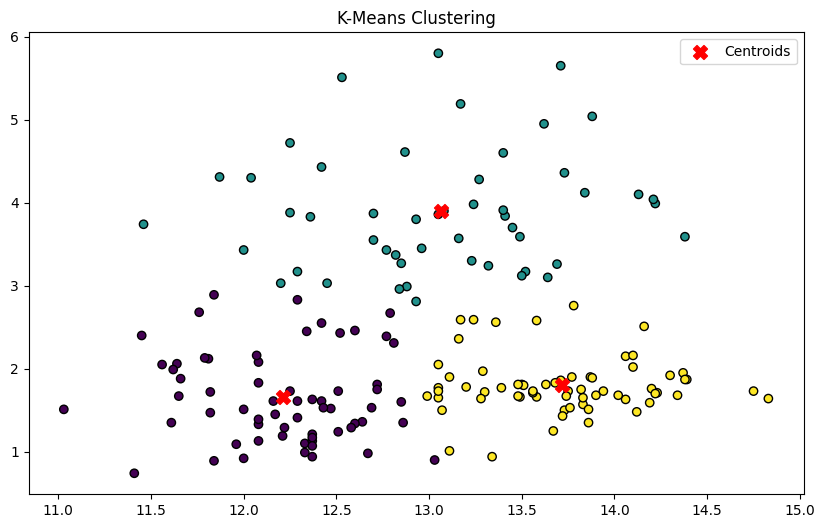

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("/content/wine-clustering.csv")

# Select features (can use any feature selection algorithm)
X = data.iloc[:, 0:2]
#X = data[[data.columns[0], data.columns[5]]] # or select columns by their numbers

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels for each data point and the coordinates of each cluster center
X['Cluster'] = kmeans.labels_
#X['Cluster Center1'] = X['Cluster'].apply(lambda x: kmeans.cluster_centers_[x][0])
#X['Cluster Center2'] = X['Cluster'].apply(lambda x: kmeans.cluster_centers_[x][1])

print("Data points with assigned clusters:\n")  # Display data points with their assigned clusters
print(X)

# Plotting the clusters and the cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


# Hierarchical clustering
using agglomerative approach

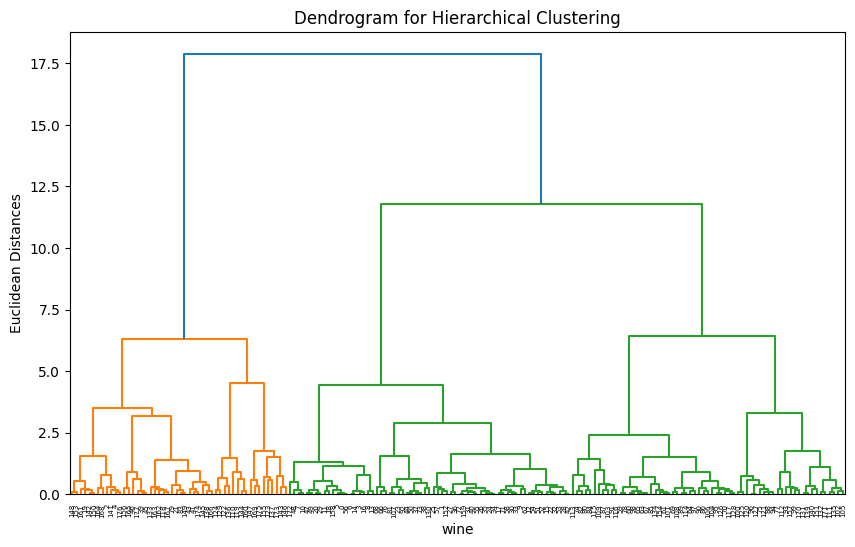

Data points with assigned clusters:

     Alcohol  Malic_Acid  Cluster
0      14.23        1.71        2
1      13.20        1.78        2
2      13.16        2.36        1
3      14.37        1.95        2
4      13.24        2.59        1
..       ...         ...      ...
173    13.71        5.65        1
174    13.40        3.91        1
175    13.27        4.28        1
176    13.17        2.59        1
177    14.13        4.10        1

[178 rows x 3 columns]


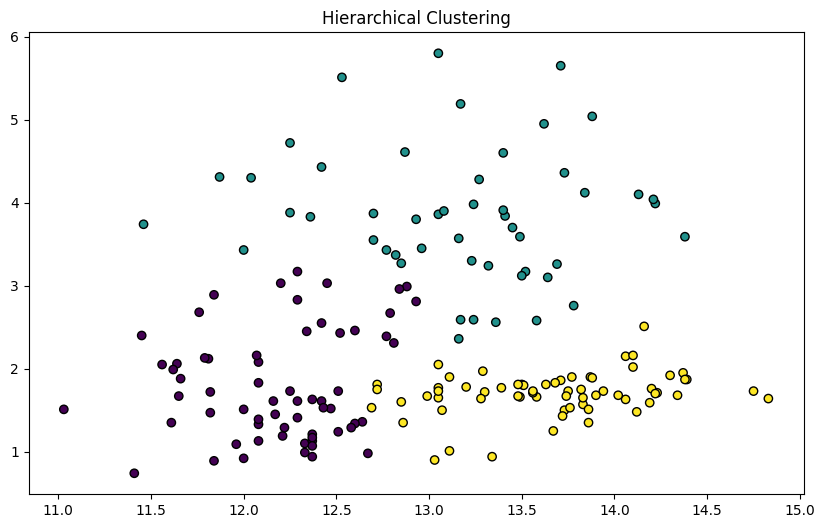

In [26]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = pd.read_csv("/content/wine-clustering.csv")

# Select features (can use any feature selection algorithm)
X = data.iloc[:, 0:2]

# Plot the dendrogram to help choose the number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("wine")
plt.ylabel("Euclidean Distances")
plt.show()

# Apply Agglomerative Hierarchical Clustering - Set the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
X['Cluster'] = hc.fit_predict(X)

# Display data points with their assigned clusters
print("Data points with assigned clusters:\n")
print(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title("Hierarchical Clustering")
plt.show()
